In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
from matplotlib.pyplot import rc_context

In [2]:
## set working directory
os.chdir("/data1/niehu/ibd_public_data_20210821/analysis_20220111/02.integrate/Myeloid/")

In [3]:
## read data
adata = sc.read_h5ad("Myeloid.bySample.n10.filtered.bbknn_umap_leiden_marker.res0.9.h5ad")
adata = sc.pp.subsample(adata, fraction=1., copy=True)

In [4]:
## add meta data
meta_data = pd.read_csv("/home/niehu/niehu/ibd_public_data_20210821/analysis_20220111/01.preprocess/cell_meta/ibd_meta_data_cells.csv", header=0)
meta_data.index = meta_data.cellName

select = meta_data[meta_data.index.isin(adata.obs.index.to_list())]
select = select.loc[adata.obs.index,:]

adata.obs["location2"] = pd.Categorical(select.location2)
adata.obs["location1"] = pd.Categorical(select.location1)
adata.obs["developmentStage"] = pd.Categorical(select.developmentStage)

/home/niehu/niehu/soft/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3012: DtypeWarning: Columns (3,4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


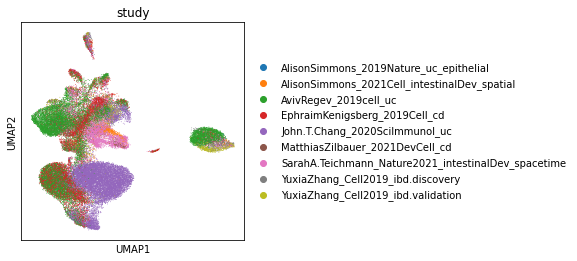

In [5]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=["study"])

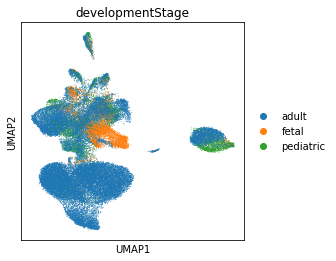

In [6]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=["developmentStage"])

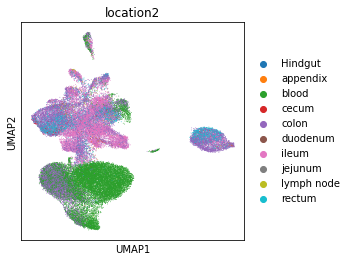

In [7]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=["location2"])

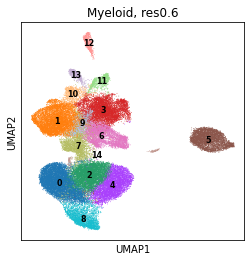

In [8]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data', title='Myeloid, res0.6', frameon=True, legend_fontsize = 8)

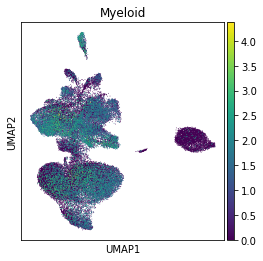

In [9]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=["CD4"], title = "Myeloid")

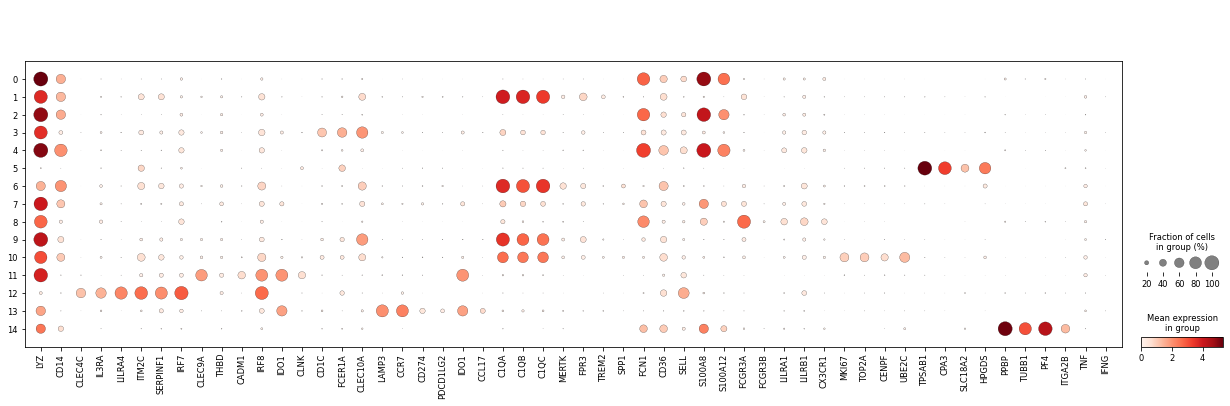

In [10]:
major_markers = ["LYZ","CD14",
                 "CLEC4C", "IL3RA", "LILRA4", "ITM2C", "SERPINF1", "IRF7", # pDC
                 "CLEC9A", "THBD", "CADM1","IRF8", "IDO1", "CLNK", # cDC1
                 "CD1C", "FCER1A", "CLEC10A",# cDC2
                 "LAMP3","CCR7","CD274","PDCD1LG2","IDO1","CCL17",# LAMP3+ DC
                 "C1QA", "C1QB", "C1QC", "MERTK", "FPR3", "TREM2","SPP1", # Macrophage
                 "FCN1","CD36","SELL", "S100A8", "S100A12", # Mono_class
                 "FCGR3A", "FCGR3B", "LILRA1", "LILRB1", "CX3CR1", ## Mono_NonClass
                  "MKI67","TOP2A","CENPF","UBE2C",
                 "TPSAB1", "CPA3", "SLC18A2", "HPGDS", # Mast
                 "PPBP","TUBB1","PF4", "ITGA2B", ## Megakaryocyte
                  "TNF", "IFNG",
                 ]
sc.pl.dotplot(adata, major_markers, groupby='leiden')

## C5 => Mast
## C14 => Megakaryocyte
## C10 => Cycling monocyte
## C13 => LAMP3+ DC
## C12 => pDC
## C11 => cDC1
## C3 => cDC2
## C0/C2/C4 => Mono_Class
## C8 => Mono_NonClass
## C1/C6/C9 => Macrophage
## C7 => inflammatory monocyte

In [11]:
adata.obs["label"] = "Unknown"
adata.obs.loc[adata.obs.leiden.isin(['5']), "label"] = "Mast"
adata.obs.loc[adata.obs.leiden.isin(['14']), "label"] = "Megakaryocyte"
adata.obs.loc[adata.obs.leiden.isin(['13']), "label"] = "LAMP3+ DC"
adata.obs.loc[adata.obs.leiden.isin(['12']), "label"] = "pDC"
adata.obs.loc[adata.obs.leiden.isin(['11']), "label"] = "cDC1"
adata.obs.loc[adata.obs.leiden.isin(['3']), "label"] = "cDC2"

adata.obs.loc[adata.obs.leiden.isin(['8']), "label"] = "Non-classical monocyte"
adata.obs.loc[adata.obs.leiden.isin(['0','2','4']), "label"] = "Classical monocyte" 
adata.obs.loc[adata.obs.leiden.isin(['10']), "label"] = "Cycling macrophage"
adata.obs.loc[adata.obs.leiden.isin(['7']), "label"] = "Inflammatory monocyte"

adata.obs.loc[adata.obs.leiden.isin(['1']), "label"] = "APOE+ macrophage"
adata.obs.loc[adata.obs.leiden.isin(['6']), "label"] = "LYVE1+ macrophage"
adata.obs.loc[adata.obs.leiden.isin(['9']), "label"] = "AREG+ macrophage"

newOrder = ["Non-classical monocyte","Classical monocyte","Inflammatory monocyte",
            "APOE+ macrophage", "LYVE1+ macrophage", "AREG+ macrophage","Cycling macrophage",
            "cDC1","cDC2","pDC","LAMP3+ DC","Mast","Megakaryocyte"]
adata.obs.label =pd.Categorical(adata.obs.label)
adata.obs.label = adata.obs.label.cat.set_categories( newOrder )

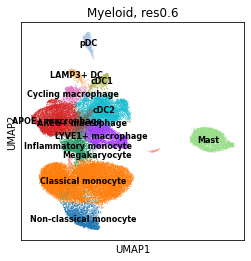

In [20]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='label', legend_loc='on data', title='Myeloid, res0.6', frameon=True, legend_fontsize = 8, save=".png")
    #sc.pl.umap(adata, color='label', title='Myeloid, res0.6', frameon=True, legend_fontsize = 8, save=".png")

In [13]:
adata.obs["major"] = "Myeloid"

In [14]:
adata = adata.raw.to_adata()

In [15]:
del adata.obs["location1"]
del adata.obs["location2"]
del adata.obs["developmentStage"]

In [16]:
#adata.var.index = [ x.replace("-","_") for x in adata.var.index.to_list()]

In [17]:
adata.write_h5ad("Myeloid.clean.h5ad")

... storing 'major' as categorical


In [18]:
adata.write_loom("Myeloid.clean.loom", write_obsm_varm=True)

In [19]:
## done